## __DeskDrop Articles Topic Modeling__

In this section, we apply Topic Modeling to discover what are the main topics of the shared articles. The Latent Dirichlet Allocation method is used, implemented in Gensim framework.

In [1]:
import pandas as pd

In [85]:
articles_df = pd.read_csv('./input/shared_articles.csv')
articles_df.head(5)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [86]:
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from gensim import corpora, models, similarities
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [88]:
#Filtering only English articles
english_articles_df = articles_df[articles_df['lang'] == 'en']

#Concatenating the articles titles and bodies
english_articles_content = (english_articles_df['title'] + ' ' + english_articles_df['text']).tolist()

In [89]:
# nltk stopwords가 다운되어있지 않다면 미리 다운 후 진행
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jipiration/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
#Loading a set of English stopwords
english_stopset = set(stopwords.words('english')).union(
    {"things", "that's", "something", "take", "don't", "may", "want", "you're", 
     "set", "might", "says", "including", "lot", "much", "said", "know", 
     "good", "step", "often", "going", "thing", "things", "think",
     "back", "actually", "better", "look", "find", "right", "example", 
     "verb", "verbs"})

__stopword(불용어)__

갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의마가 없는 단어 토큰을 제거하는 작업이 필요. 여기서 큰 의마가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말한다. 예를 들어, I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우가 있기에, 이러한 단어들을 불용어(stopword)라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있음.

물론 불용어는 개발자가 직접 정의할 수 있기에, 필요에 따라 추가하여 사용. 


In [91]:
#Tokenizing words of articles 
#NLTK에서는 정규 표현식을 사용해서 단어 토큰화를 수행하는 RegexpTokenizer를 지원.
tokenizer = RegexpTokenizer(r"(?u)[\b\#a-zA-Z][\w&-_]+\b")
english_articles_tokens = list(map(lambda d: [token for token in tokenizer.tokenize(d.lower()) if token not in english_stopset], english_articles_content))

In [92]:
#Processing bigrams from unigrams (sets of two works frequently together in the corpus)
bigram_transformer = models.Phrases(english_articles_tokens)
english_articles_unigrams_bigrams_tokens = list(bigram_transformer[english_articles_tokens])

2020-11-29 13:28:24,841 : INFO : collecting all words and their counts
2020-11-29 13:28:24,844 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-11-29 13:28:26,792 : INFO : collected 896098 word types from a corpus of 1221952 words (unigram + bigrams) and 2264 sentences
2020-11-29 13:28:26,792 : INFO : using 896098 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [93]:
#Creating a dictionary and filtering out too rare and too common tokens
english_dictionary = corpora.Dictionary(english_articles_unigrams_bigrams_tokens)
english_dictionary.filter_extremes(no_below=5, no_above=0.4, keep_n=None)
english_dictionary.compactify()
print(english_dictionary)

2020-11-29 13:28:52,315 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-29 13:28:53,604 : INFO : built Dictionary(64132 unique tokens: ['actual', 'advocates', 'agreed_upon', 'agreements', 'aim']...) from 2264 documents (total 1132103 corpus positions)
2020-11-29 13:28:53,717 : INFO : discarding 47018 tokens: [('also', 1528), ('alt-coins', 3), ('bet_ethereum', 3), ('bonneau', 3), ('bushwick', 3), ('buterin', 4), ("buterin's", 3), ('could', 981), ('crypto-currencies', 2), ('crystallization', 3)]...
2020-11-29 13:28:53,717 : INFO : keeping 17114 tokens which were in no less than 5 and no more than 905 (=40.0%) documents
2020-11-29 13:28:53,745 : INFO : resulting dictionary: Dictionary(17114 unique tokens: ['actual', 'advocates', 'agreed_upon', 'agreements', 'aim']...)


Dictionary(17114 unique tokens: ['actual', 'advocates', 'agreed_upon', 'agreements', 'aim']...)


In [94]:
#Processing Bag-of-Words (BoW) for each article
english_articles_bow = [english_dictionary.doc2bow(doc) for doc in english_articles_unigrams_bigrams_tokens]

In [ ]:
#Training the LDA topic model on English articles
lda_model = models.LdaModel(english_articles_bow, id2word=english_dictionary, num_topics=30, passes=10, iterations=500)

CPU times: user 2min 33s, sys: 1.05 s, total: 2min 34s<br>
Wall time: 43.6 s

In [96]:
#Processing the topics for each article
english_articles_lda = lda_model[english_articles_bow]

In [97]:
def get_topics_top_words(model, max_words):
    all_topics = model.show_topics(-1, max_words*2, False, False)
    topics = []
    for topic in all_topics:    
        min_score_word = float(abs(topic[1][0][1])) / 2.
        top_positive_words = list(map(lambda y: y[0].replace('_',' '), filter(lambda x: x[1] > min_score_word, topic[1])))[0:max_words]
        topics.append('[' + ', '.join(top_positive_words) + ']')
    return topics

#Computing the main topic of each article
topics_top_words = get_topics_top_words(lda_model, 5)

Below, we can see the discovered topics on English articles, sorted by the number of articles about the topics (popularity).

In [98]:
def get_main_topics(corpus_lda, topics_labels):
    min_strength = (1.0 / float(len(topics_labels))) + 0.01
    main_topics = map(lambda ts: sorted(ts, key=lambda t: -t[1])[0][0] if sorted(ts, key=lambda t: -t[1])[0][1] > min_strength else None, corpus_lda)
    main_topics_labels = map(lambda x: topics_labels[x] if x != None else '', main_topics)
    return list(main_topics_labels)

#Return the discovered topics, sorted by popularity
corpus_main_topics = get_main_topics(english_articles_lda, topics_top_words)

main_topics_df = pd.DataFrame(corpus_main_topics, columns=['topic']).groupby('topic').size().sort_values(ascending=True).reset_index()
main_topics_df.columns = ['topic', 'count']
main_topics_df.sort_values('count', ascending=False)

,topic,count
29,"[technology, companies, company, world, us]",697
28,"[customers, digital, companies, business, comp...",258
27,[drupal],152
26,"[event, application, events, system, user]",129
25,"[machine learning, language]",95
24,"[trello, email, browser, app, notifications]",92
23,"[devices, app, device, phone, apple]",87
22,[team],86
21,[google],73
20,"[code, java]",69


<AxesSubplot:title={'center':'Main topics on shared English articles'}, ylabel='topic'>

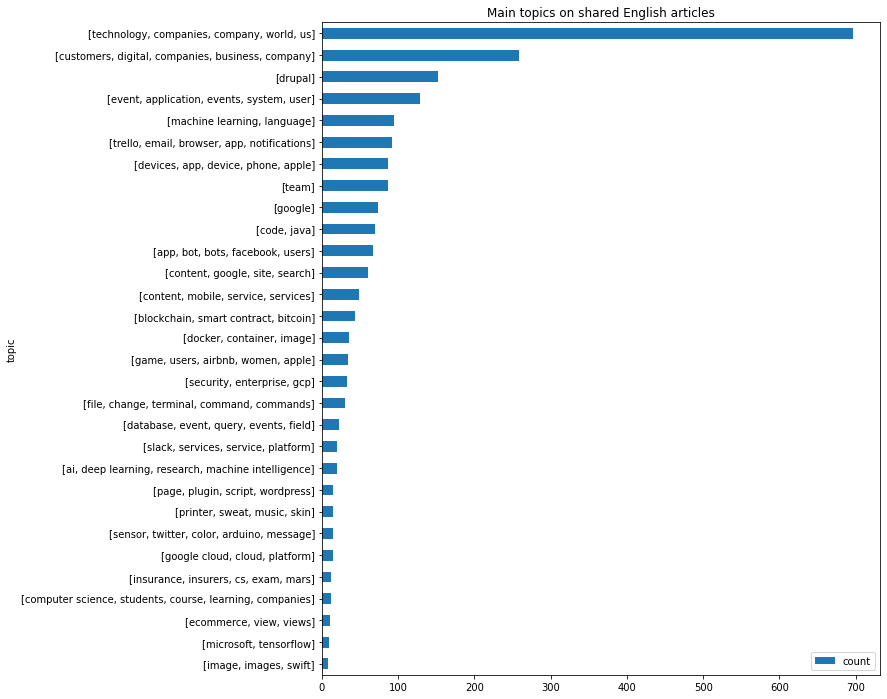

In [120]:
main_topics_df.plot(kind='barh', x='topic', y='count', figsize=(10, 12),
                   title='Main topics on shared English articles')  # kind='barh' : 가로축 바